# LetsGrowMore (LGMVIP- APRIL2022)

# AUTHOR NAME - TANUJ


# Datasetlinks: : 

https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

In this model I used the Stacked LSTM(Long Short Term Memory). A Machine Learning Model for Stock Market Prediction. Stock market prediction is the act of trying to determine the future value of a company stock or other financial instrument traded on a financial exchange.

# Import libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")

In [2]:
stock_df = pd.read_csv("NSE-TATAGLOBAL.csv")
stock_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
stock_df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


# DATA EXPLORATION

In [4]:
# check shape of data
stock_df.shape

(2035, 8)

In [5]:
# get statistical summaries of dataset
stock_df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [6]:
# check is there any null values present of not
stock_df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [7]:
stock_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [8]:
stock_df.info

<bound method DataFrame.info of             Date    Open    High     Low    Last   Close  \
0     2018-09-28  234.05  235.95  230.20  233.50  233.75   
1     2018-09-27  234.55  236.80  231.10  233.80  233.25   
2     2018-09-26  240.00  240.00  232.50  235.00  234.25   
3     2018-09-25  233.30  236.75  232.00  236.25  236.10   
4     2018-09-24  233.55  239.20  230.75  234.00  233.30   
...          ...     ...     ...     ...     ...     ...   
2030  2010-07-27  117.60  119.50  112.00  118.80  118.65   
2031  2010-07-26  120.10  121.00  117.10  117.10  117.60   
2032  2010-07-23  121.80  121.95  120.25  120.35  120.65   
2033  2010-07-22  120.30  122.00  120.25  120.75  120.90   
2034  2010-07-21  122.10  123.00  121.05  121.10  121.55   

      Total Trade Quantity  Turnover (Lacs)  
0                  3069914          7162.35  
1                  5082859         11859.95  
2                  2240909          5248.60  
3                  2349368          5503.90  
4                

# Exploratory Data Analysis (EDA)
Data visualization

In [9]:
stock_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

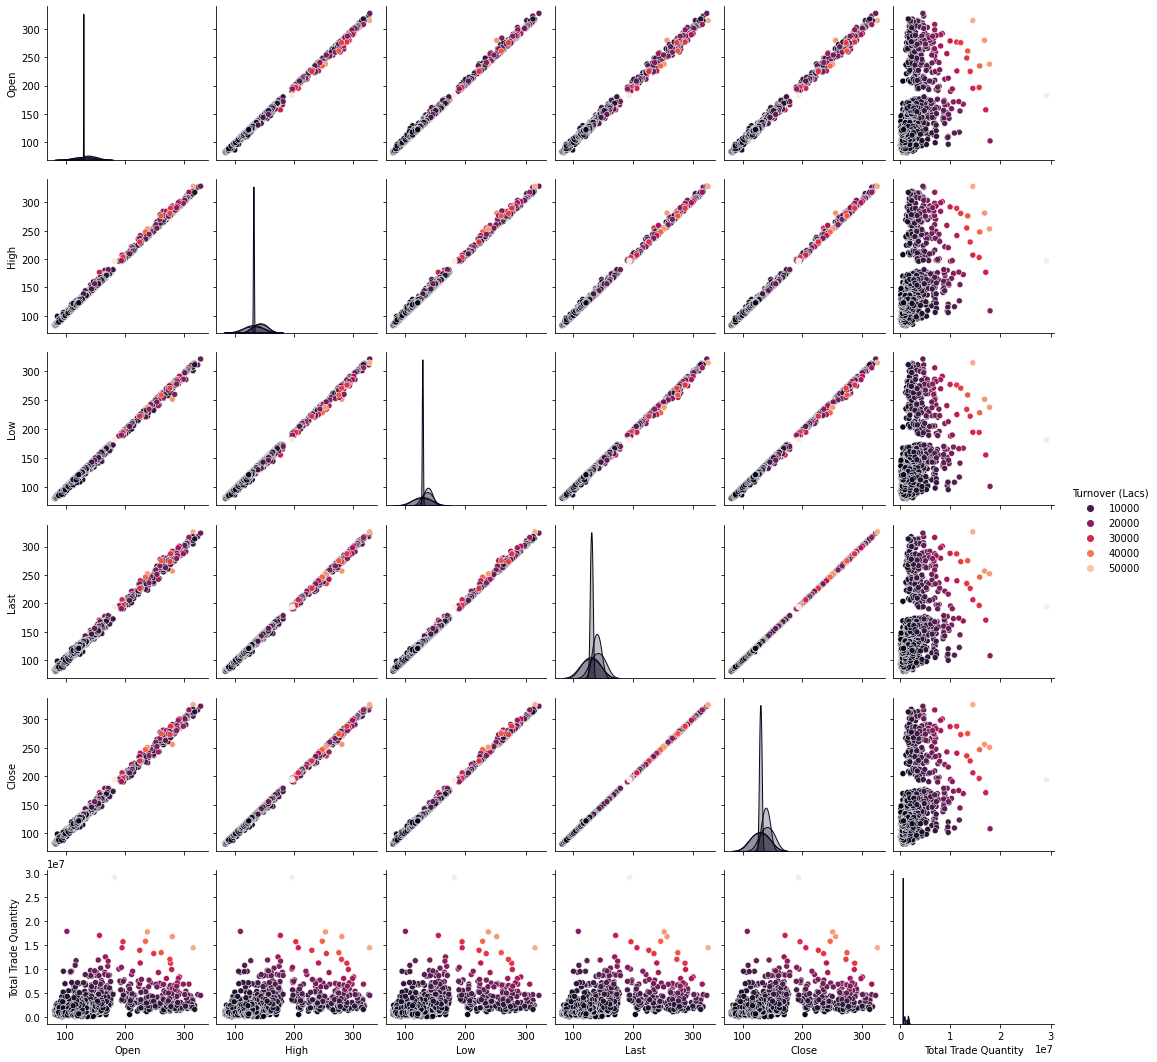

In [10]:
sns.pairplot(stock_df, hue= 'Turnover (Lacs)', palette= "rocket")
plt.show()

In [11]:
df_close=stock_df.reset_index()['Close']
df_close

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [12]:
df_open=stock_df.reset_index()['Open']
df_open

0       234.05
1       234.55
2       240.00
3       233.30
4       233.55
         ...  
2030    117.60
2031    120.10
2032    121.80
2033    120.30
2034    122.10
Name: Open, Length: 2035, dtype: float64

Let us plot the Close value graph using pyplot

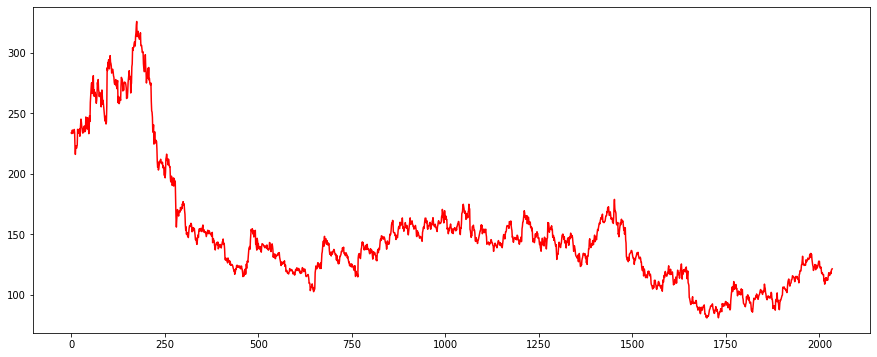

In [13]:
plt.figure(figsize=(15,6))
plt.plot(df_close, c= "r")
plt.show()

Let us plot the Open value graph using pyplot

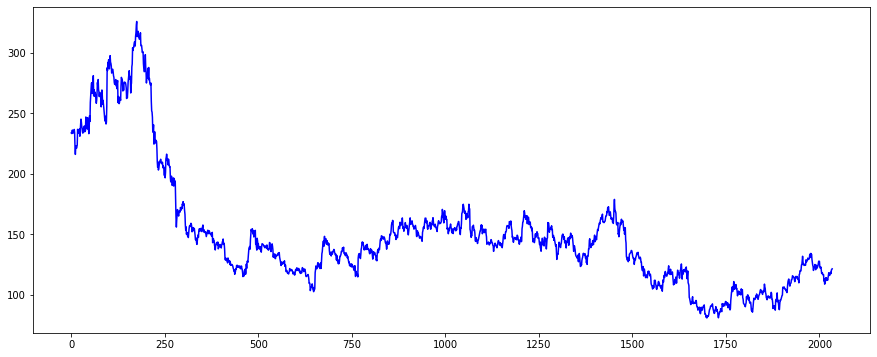

In [14]:
plt.figure(figsize=(15,6))
plt.plot(df_close, c= "b")
plt.show()

Let us plot the High value graph using pyplot

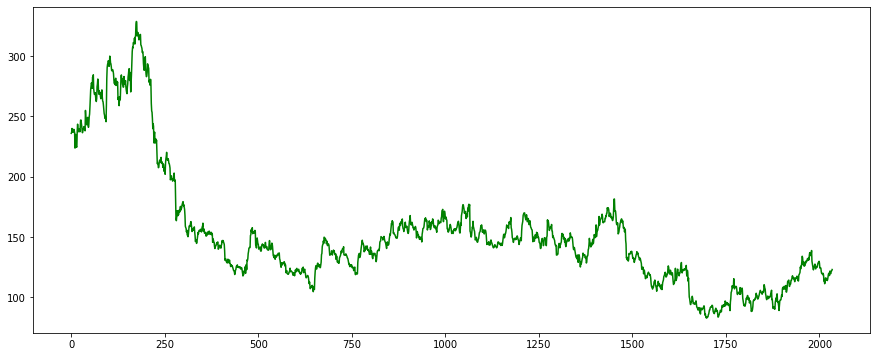

In [15]:
plt.figure(figsize=(15,6))
df_high=stock_df.reset_index()['High']
plt.plot(df_high, c="g")
plt.show()

Let us plot the High value graph using pyplot

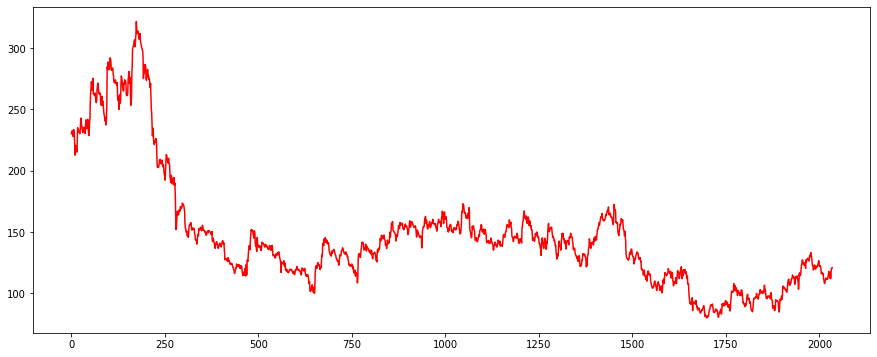

In [16]:
plt.figure(figsize=(15,6))
df_low=stock_df.reset_index()['Low']
plt.plot(df_low, c="r")
plt.show()

Since LSTM are sensitive to the scale of the data, so we apply MinMax Scaler to transform our values between 0 and 1

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df_high = scaler.fit_transform(np.array(df_high).reshape(-1,1))

In [18]:
df_high.shape

(2035, 1)

In [19]:
df_low.shape

(2035,)

In [20]:
df_open.shape

(2035,)

In [21]:
df_low.shape

(2035,)

In [22]:
print(df_high)

[[0.62268754]
 [0.62614353]
 [0.6391543 ]
 ...
 [0.15917869]
 [0.15938199]
 [0.16344786]]


In [23]:
print(df_low)

0       230.20
1       231.10
2       232.50
3       232.00
4       230.75
         ...  
2030    112.00
2031    117.10
2032    120.25
2033    120.25
2034    121.05
Name: Low, Length: 2035, dtype: float64


In [24]:
print(df_open)

0       234.05
1       234.55
2       240.00
3       233.30
4       233.55
         ...  
2030    117.60
2031    120.10
2032    121.80
2033    120.30
2034    122.10
Name: Open, Length: 2035, dtype: float64


In [25]:
print(df_low)

0       230.20
1       231.10
2       232.50
3       232.00
4       230.75
         ...  
2030    112.00
2031    117.10
2032    120.25
2033    120.25
2034    121.05
Name: Low, Length: 2035, dtype: float64


# Train Test Split

In time-series data the one data is dependent on other data. The training size should be 75% of the total length of the data frame, the test size should be the difference between the length of the dataset and the training size.

In [26]:
training_size1 = int(len(df_high) * 0.75)
test_size = len(df_high) - training_size1
train_data, test_data = df_high[0:training_size1,:], df_high[training_size1:len(df_high),:1]

In [27]:
training_size1,test_size

(1526, 509)

# Data Preprocessing

In [28]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [29]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

# LSTM

Reshape the input to be [samples, time steps, features] which is the requirement of LSTM


In [30]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
print(x_train.shape), print(y_train.shape)

(1425, 100, 1)
(1425,)


(None, None)

In [31]:
print(x_test.shape), print(y_test.shape)

(408, 100, 1)
(408,)


(None, None)

# Import required modules for the stacked LSTM.

In [32]:
import math
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [33]:
#Create the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 60, verbose = 1)

Epoch 1/100
24/24 [==============================] - 20s 378ms/step - loss: 0.0198 - val_loss: 0.0077
Epoch 2/100
24/24 [==============================] - 8s 313ms/step - loss: 0.0025 - val_loss: 0.0011
Epoch 3/100
24/24 [==============================] - 8s 333ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 4/100
24/24 [==============================] - 8s 337ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 5/100
24/24 [==============================] - 7s 309ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 6/100
24/24 [==============================] - 7s 308ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 7/100
24/24 [==============================] - 8s 327ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 8/100
24/24 [==============================] - 8s 324ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 9/100
24/24 [==============================] - 7s 301ms/step - loss: 0.0012 - val_loss: 8.3259e-04
Epoch 10/100
24/24 [==============================] - 7s 305ms/step - loss: 9.4736e-04

In [36]:
#Lets predict and check performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [37]:
#Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [38]:
#Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train, train_predict))

168.45578440219407

In [39]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

109.26693815770581

# Plotting the graph according to train and test data

In [40]:
#Plotting

#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df_high)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(df_high)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df_high) - 1, :] = test_predict

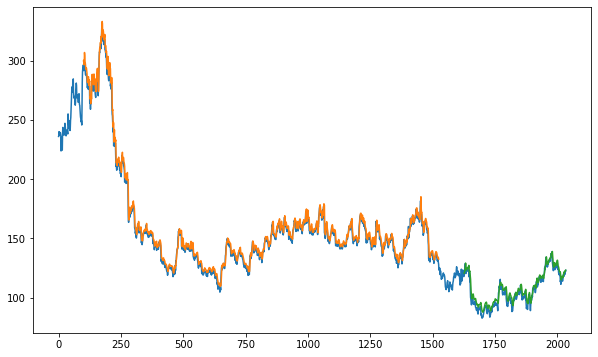

Green Colour indicates the Predicted Data
Blue Colour indicates the Complete Data
Orange  Colour indicates the Train Data


In [41]:
#Plot baseline and predictions
plt.figure(figsize=(10,6))

plt.plot(scaler.inverse_transform(df_high))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

print("Green Colour indicates the Predicted Data")
print("Blue Colour indicates the Complete Data")
print("Orange  Colour indicates the Train Data")

#Green indicates the Predicted Data
#Blue indicates the Complete Data
#Orange indicates the Train Data

In [42]:
#Predict the next 28 days Stock Price
len(test_data), x_test.shape

(509, (408, 100, 1))

In [43]:
x_input = test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

Predicting values for next 28 days

In [44]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output=[]
n_steps=100
nextNumberOfDays = 28
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.16889815]
101
1 day input [0.13254727 0.13397032 0.13356373 0.13498679 0.14108559 0.13498679
 0.12644847 0.12685505 0.12482212 0.14515145 0.1467778  0.15003049
 0.15368977 0.17198618 0.16548079 0.17625534 0.17564546 0.19129904
 0.20817239 0.20309006 0.18479366 0.17930474 0.1896727  0.17483228
 0.17849156 0.17645863 0.18540354 0.18377719 0.19190892 0.18987599
 0.19028258 0.19394186 0.20004066 0.19638138 0.19495832 0.20349665
 0.19597479 0.21162838 0.22036999 0.20979874 0.21528766 0.21589754
 0.21610083 0.22748526 0.19150234 0.1833706  0.17340923 0.16751372
 0.1622281  0.17056312 0.17462899 0.17930474 0.18174426 0.16853019
 0.16548079 0.1742224  0.1713763  0.17300264 0.17157959 0.17767839
 0.18459036 0.18702988 0.18987599 0.19109575 0.18581012 0.17015654
 0.16751372 0.16974995 0.16609067 0.15531612 0.15003049 0.15064037
 0.14860744 0.14596463 0.15043708 0.14413499 0.12441553 0.12827811
 0.11547062 0.12034966 0.13478349 0.13498679 0.12868469 0.13295385
 0.12807481 0.12624517 0.13051433

In [45]:
day_new = np.arange(1,101)
day_pred = np.arange(101,129)

In [46]:
day_new.shape

(100,)

In [47]:
day_pred.shape

(28,)

In [48]:
ds3 = df_high.tolist()
ds3.extend(lst_output)

len(df_high)

2035

Graph of actual values in last 100 days

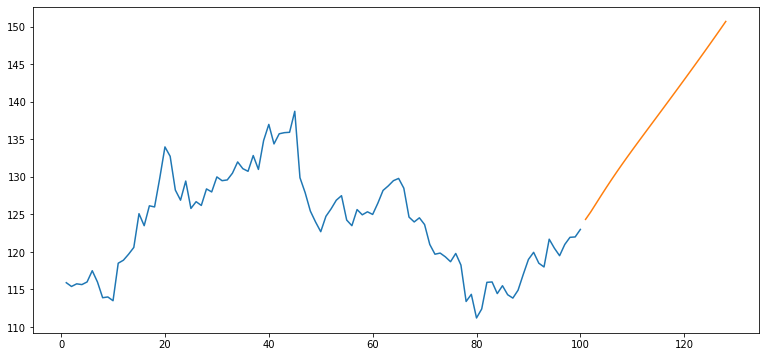

In [49]:
plt.figure(figsize=(13,6))

plt.plot(day_new, scaler.inverse_transform(df_high[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

plt.show()

Graph of predicted values for next 30 days

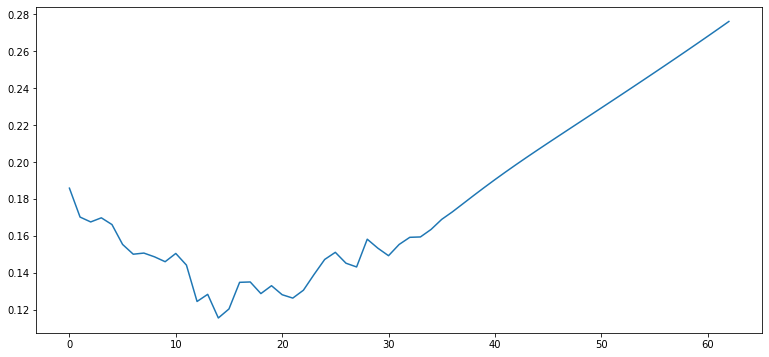

In [50]:
plt.figure(figsize=(13,6))

ds3=df_high.tolist()
ds3.extend(lst_output)
plt.plot(ds3[2000:])
plt.show()

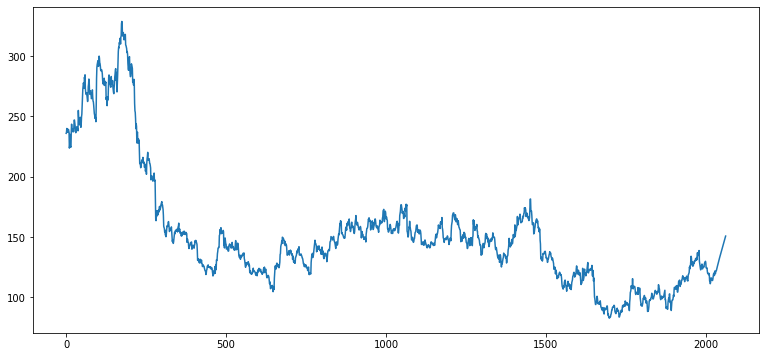

In [51]:
plt.figure(figsize=(13,6))

ds3=scaler.inverse_transform(ds3).tolist()
plt.plot(ds3)

plt.show()

MODEL CREATED SUCCESSFULLY !!

# Thank You!